In [ ]:
print("selected dataset: ML-EdgeIIoT-dataset.csv")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

selected dataset: ML-EdgeIIoT-dataset.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML-EdgeIIoT-dataset (1).csv", low_memory = False).sample(10000)
visual_df = df.copy()
df.head()
df_labels = df[["Attack_label"]]
df_types = df[["Attack_type"]]
df = df.drop(["Attack_label", "Attack_type"], axis = 1)
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.msg,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id
89676,2021 20:19:58.329265000,192.168.0.128,192.168.0.170,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99929,2021 18:50:54.865259000,192.168.0.170,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108247,2021 15:39:56.577601000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
46608,2021 19:04:37.308108000,145.91.153.190,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105888,2021 12:55:22.577080000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df["arp.dst.proto_ipv4"].value_counts()

,count
arp.dst.proto_ipv4,
0,9732
192.168.0.128,128
0.0,87
192.168.0.170,38
192.168.0.147,10
192.168.0.1,2
192.168.0.101,2
192.168.0.129,1


In [ ]:
df.columns.nunique()

61

In [ ]:
df.dtypes.value_counts()

,count
float64,42
object,19


In [ ]:
print(df["ip.src_host"])

89676      192.168.0.128
99929      192.168.0.170
108247     192.168.0.101
46608     145.91.153.190
105888     192.168.0.128
               ...      
68912                  0
137991     192.168.0.128
81701      192.168.0.170
62363      192.168.0.170
151397     192.168.0.128
Name: ip.src_host, Length: 10000, dtype: object


In [ ]:
df["ip.dst_host"].value_counts()

,count
ip.dst_host,
192.168.0.128,4767
192.168.0.170,2661
0,1301
192.168.0.101,643
0.0,87
...,...
7.70.7.158,1
108.30.100.167,1
180.176.167.53,1


In [ ]:
# Converting the ip.src_host to int
import ipaddress
def ip_to_int(ip_address):
  try:
    return int(ipaddress.IPv4Address(ip_address))
  except:
    if (ip_address == "0.0") or (ip_address == "0"):
      return 0
    else:
      return np.nan

df["ip.src_host"] = df["ip.src_host"].apply(ip_to_int)
df["arp.dst.proto_ipv4"] = df["arp.dst.proto_ipv4"].apply(ip_to_int)
df["arp.src.proto_ipv4"] = df["arp.src.proto_ipv4"].apply(ip_to_int)
df["ip.dst_host"] = df["ip.dst_host"].apply(ip_to_int)

In [ ]:
df[["ip.src_host", "ip.dst_host", "arp.dst.proto_ipv4", "arp.src.proto_ipv4"]]

,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.src.proto_ipv4
89676,3232235648,3232235690,0,0
99929,3232235690,3232235648,0,0
108247,3232235621,3232235648,0,0
46608,2438699454,3232235648,0,0
105888,3232235648,3232235621,0,0
...,...,...,...,...
68912,0,0,3232235648,3232235690
137991,3232235648,0,0,0
81701,3232235690,3232235648,0,0
62363,3232235690,3232235648,0,0


In [ ]:
df["frame.time"]

,frame.time
89676,2021 20:19:58.329265000
99929,2021 18:50:54.865259000
108247,2021 15:39:56.577601000
46608,2021 19:04:37.308108000
105888,2021 12:55:22.577080000
...,...
68912,2021 17:15:06.379119000
137991,242.200.182.207
81701,2021 19:37:55.193039000
62363,2021 19:55:32.425759000


In [ ]:
df.dropna(subset = ["ip.src_host", "ip.dst_host", "arp.src.proto_ipv4", "arp.dst.proto_ipv4"], inplace = True)

In [ ]:
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.msg,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id
89676,2021 20:19:58.329265000,3232235648,3232235690,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99929,2021 18:50:54.865259000,3232235690,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108247,2021 15:39:56.577601000,3232235621,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
46608,2021 19:04:37.308108000,2438699454,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105888,2021 12:55:22.577080000,3232235648,3232235621,0,0.0,0.0,0,0.0,0.0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df["ip.src_host"].isna().sum()

0

In [ ]:
df.isnull().sum()

,0
frame.time,0
ip.src_host,0
ip.dst_host,0
arp.dst.proto_ipv4,0
arp.opcode,0
...,...
mqtt.topic_len,0
mqtt.ver,0
mbtcp.len,0
mbtcp.trans_id,0


In [ ]:
# Counting the unique values for each columns
for col in df.columns:
  df[col].nunique
  print(col, df[col].nunique())

frame.time 9831
ip.src_host 1209
ip.dst_host 509
arp.dst.proto_ipv4 7
arp.opcode 3
arp.hw.size 2
arp.src.proto_ipv4 5
icmp.checksum 914
icmp.seq_le 958
icmp.transmit_timestamp 5
icmp.unused 1
http.file_data 47
http.content_length 19
http.request.uri.query 145
http.request.method 5
http.referer 4
http.request.full_uri 302
http.request.version 4
http.response 2
http.tls_port 1
tcp.ack 2302
tcp.ack_raw 6443
tcp.checksum 7415
tcp.connection.fin 2
tcp.connection.rst 2
tcp.connection.syn 2
tcp.connection.synack 2
tcp.dstport 2804
tcp.flags 9
tcp.flags.ack 2
tcp.len 289
tcp.options 4805
tcp.payload 1835
tcp.seq 1597
tcp.srcport 3947
udp.port 5
udp.stream 935
udp.time_delta 4
dns.qry.name 88
dns.qry.name.len 3
dns.qry.qu 15
dns.qry.type 1
dns.retransmission 1
dns.retransmit_request 1
dns.retransmit_request_in 1
mqtt.conack.flags 3
mqtt.conflag.cleansess 2
mqtt.conflags 2
mqtt.hdrflags 5
mqtt.len 4
mqtt.msg_decoded_as 1
mqtt.msg 46
mqtt.msgtype 5
mqtt.proto_len 2
mqtt.protoname 3
mqtt.topic 3
m

Handling the frame.time

In [ ]:
def handle_frame(row):
  try:
    row = pd.to_datetime(row, format = "%Y %H:%M:%S.%f")
    return row
  except ValueError:
    try:
      return pd.to_datetime(row)
    except:
      return pd.NaT
df["frame.time"] = df["frame.time"].apply(handle_frame)

In [ ]:
# convert dask dataframe to pandas dataframe
df["frame.time"]

,frame.time
89676,2021-01-01 20:19:58.329265
99929,2021-01-01 18:50:54.865259
108247,2021-01-01 15:39:56.577601
46608,2021-01-01 19:04:37.308108
105888,2021-01-01 12:55:22.577080
...,...
68912,2021-01-01 17:15:06.379119
137991,NaT
81701,2021-01-01 19:37:55.193039
62363,2021-01-01 19:55:32.425759


In [ ]:
df.dropna(subset = ["frame.time"], inplace = True)
df["frame.time"]

,frame.time
89676,2021-01-01 20:19:58.329265
99929,2021-01-01 18:50:54.865259
108247,2021-01-01 15:39:56.577601
46608,2021-01-01 19:04:37.308108
105888,2021-01-01 12:55:22.577080
...,...
90011,2021-01-01 20:22:56.257946
68912,2021-01-01 17:15:06.379119
81701,2021-01-01 19:37:55.193039
62363,2021-01-01 19:55:32.425759


In [ ]:
df['year'] = df['frame.time'].dt.year
df['month'] = df['frame.time'].dt.month
df['day'] = df['frame.time'].dt.day
df['hour'] = df['frame.time'].dt.hour
df['minute'] = df['frame.time'].dt.minute
df['second'] = df['frame.time'].dt.second
df['microsecond'] = df['frame.time'].dt.microsecond

In [ ]:
df.drop("frame.time", axis = 1, inplace = True)

In [ ]:
df.isna().sum()

,0
ip.src_host,0
ip.dst_host,0
arp.dst.proto_ipv4,0
arp.opcode,0
arp.hw.size,0
...,...
day,0
hour,0
minute,0
second,0


In [ ]:
# print(df["Attack_label"].value_counts())
# print(df["Attack_type"].value_counts())
# print(df["Attack_type"].nunique())

In [ ]:
# checking columns with the 0.0 value in each row
def zero_col(df):
  for col in df.columns:
    if (df[col] == 0.0).all():
      print(col)
zero_col(df)

icmp.unused
http.tls_port
dns.qry.qu
dns.qry.type
dns.retransmission
dns.retransmit_request
dns.retransmit_request_in
mqtt.msg_decoded_as
mbtcp.len
mbtcp.trans_id
mbtcp.unit_id


In [ ]:
# droping the columns containing only 0.0 in each rows
list = ["icmp.unused",
        "http.tls_port",
        "dns.qry.type",
        "dns.retransmit_request_in",
        "mqtt.msg_decoded_as",
        "mbtcp.len",
        "mbtcp.trans_id",
        "mbtcp.unit_id"]
df.drop(list, axis = 1, inplace = True)
print(df.columns.nunique())

59


In [ ]:
df.dtypes.value_counts()

,count
float64,34
object,14
int32,7
int64,4


In [ ]:
df.columns.nunique()

59

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8980 entries, 89676 to 151397
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ip.src_host              8980 non-null   int64  
 1   ip.dst_host              8980 non-null   int64  
 2   arp.dst.proto_ipv4       8980 non-null   int64  
 3   arp.opcode               8980 non-null   float64
 4   arp.hw.size              8980 non-null   float64
 5   arp.src.proto_ipv4       8980 non-null   int64  
 6   icmp.checksum            8980 non-null   float64
 7   icmp.seq_le              8980 non-null   float64
 8   icmp.transmit_timestamp  8980 non-null   float64
 9   http.file_data           8980 non-null   object 
 10  http.content_length      8980 non-null   float64
 11  http.request.uri.query   8980 non-null   object 
 12  http.request.method      8980 non-null   object 
 13  http.referer             8980 non-null   object 
 14  http.request.full_uri  

In [ ]:
df.shape

(8980, 59)

In [ ]:
print(df.select_dtypes(include = "object").columns)

Index(['http.file_data', 'http.request.uri.query', 'http.request.method',
       'http.referer', 'http.request.full_uri', 'http.request.version',
       'tcp.options', 'tcp.payload', 'tcp.srcport', 'dns.qry.name.len',
       'mqtt.conack.flags', 'mqtt.msg', 'mqtt.protoname', 'mqtt.topic'],
      dtype='object')


In [ ]:
print(df.select_dtypes(include = ["float64", "int64"]).columns)

Index(['ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4', 'arp.opcode',
       'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum', 'icmp.seq_le',
       'icmp.transmit_timestamp', 'http.content_length', 'http.response',
       'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq',
       'udp.port', 'udp.stream', 'udp.time_delta', 'dns.qry.name',
       'dns.qry.qu', 'dns.retransmission', 'dns.retransmit_request',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len',
       'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.topic_len', 'mqtt.ver'],
      dtype='object')


In [ ]:
cat_cols = ['http.request.method', 'http.referer', 'http.request.version',
       'dns.qry.name.len', 'mqtt.conack.flags', 'mqtt.protoname', 'mqtt.topic']

In [ ]:
# handling all categorical cat_cols
# one hot encoding
df = pd.get_dummies(df, columns = cat_cols)

In [ ]:
df.dtypes.value_counts()

,count
float64,34
bool,24
object,7
int32,7
int64,4


Handling other object types

In [ ]:
print(df.select_dtypes(include = "object").columns)
cat_cols = df.select_dtypes(include = "object").columns

Index(['http.file_data', 'http.request.uri.query', 'http.request.full_uri',
       'tcp.options', 'tcp.payload', 'tcp.srcport', 'mqtt.msg'],
      dtype='object')


In [ ]:
df[cat_cols] = df[cat_cols].astype("category")

In [ ]:
df.dtypes[df.dtypes == "category"]

,0
http.file_data,category
http.request.uri.query,category
http.request.full_uri,category
tcp.options,category
tcp.payload,category
tcp.srcport,category
mqtt.msg,category


In [ ]:
df.drop(["http.file_data", "http.request.uri.query", "http.request.full_uri", "tcp.options", "tcp.payload", "tcp.srcport", "mqtt.msg"], axis = 1, inplace = True)

In [ ]:
df.dtypes.value_counts()

,count
float64,34
bool,24
int32,7
int64,4


# Labels of Attack_type

In [ ]:
# now handling the Attack_type categories
df_types["Attack_type"].value_counts()

,count
Attack_type,
Normal,1589
DDoS_UDP,933
DDoS_ICMP,878
Ransomware,671
Uploading,660
DDoS_TCP,655
XSS,653
Vulnerability_scanner,652
Backdoor,649


# Visualizations

<ipython-input-189-93aca7071c2c>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(top_srcs.index, rotation = 90)
<ipython-input-189-93aca7071c2c>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(top_dsts.index, rotation = 90)


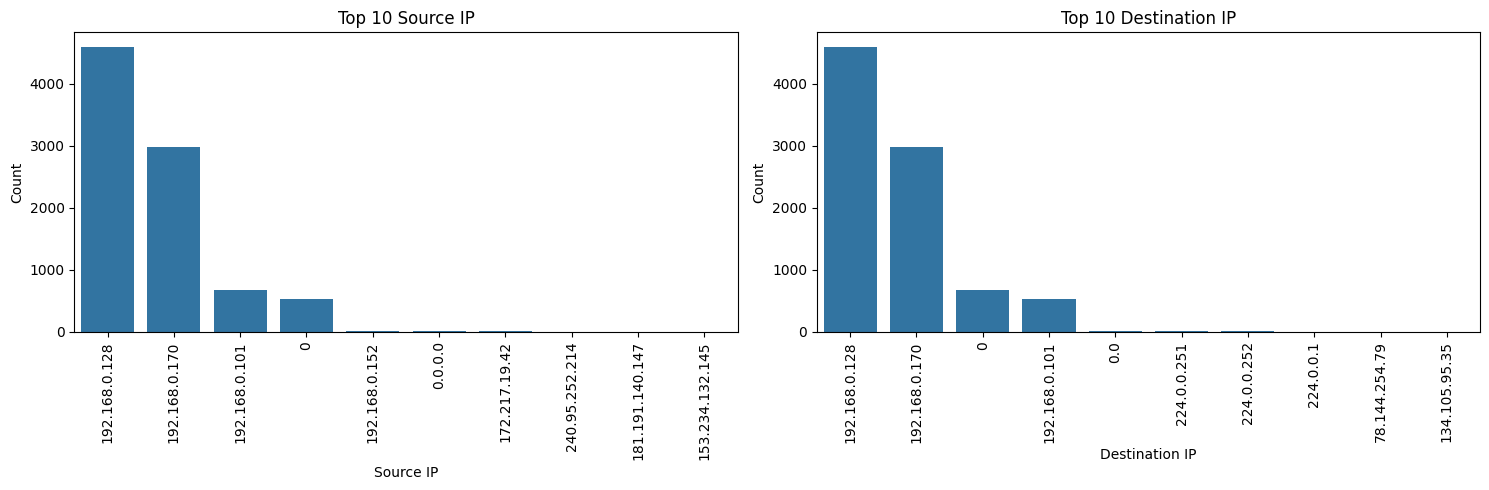

In [ ]:
# top sources
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
top_srcs = visual_df["ip.src_host"].value_counts().head(10)
sns.barplot(x = top_srcs.index, y = top_srcs, ax = axes[0])
axes[0].set_xticklabels(top_srcs.index, rotation = 90)
axes[0].set_xlabel("Source IP")
axes[0].set_ylabel("Count")
axes[0].set_title("Top 10 Source IP")

# top destinations
top_dsts = visual_df["ip.dst_host"].value_counts().head(10)
sns.barplot(x = top_dsts.index, y = top_srcs, ax = axes[1])
axes[1].set_xticklabels(top_dsts.index, rotation = 90)
axes[1].set_xlabel("Destination IP")
axes[1].set_ylabel("Count")
axes[1].set_title("Top 10 Destination IP")
plt.tight_layout()
plt.show()

In [ ]:
numerical_df = visual_df.select_dtypes(include = ["float64", "int64"])
numerical_df.corr()["Attack_label"].sort_values(ascending = False).head()

,Attack_label
Attack_label,1.000000
icmp.seq_le,0.121573
icmp.checksum,0.116563
udp.stream,0.112729
tcp.connection.syn,0.096785


<Axes: >

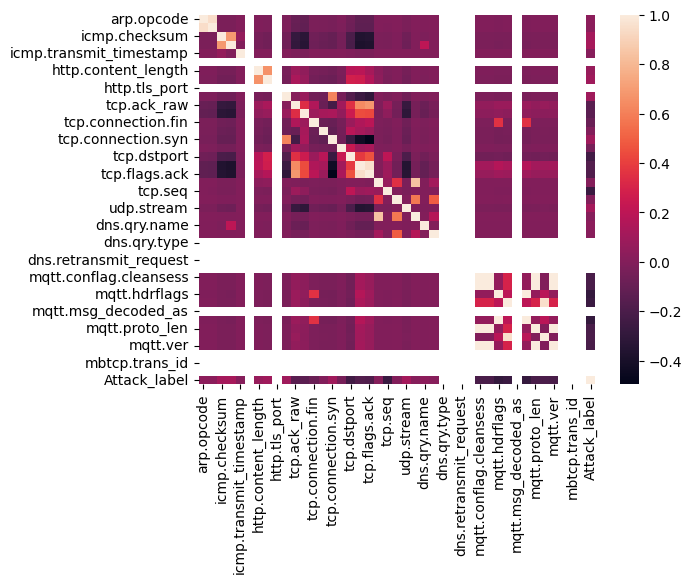

In [ ]:
sns.heatmap(numerical_df.corr())

# Machine Learning Algo application

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
df1 = df.copy()
df1 = df1.merge(df_labels, left_index = True, right_index = True)
df1

,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,http.content_length,...,mqtt.conack.flags_0,mqtt.conack.flags_0.0,mqtt.conack.flags_0x00000000,mqtt.protoname_0,mqtt.protoname_0.0,mqtt.protoname_MQTT,mqtt.topic_0,mqtt.topic_0.0,mqtt.topic_Temperature_and_Humidity,Attack_label
89676,3232235648,3232235690,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,1
99929,3232235690,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,1
108247,3232235621,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,True,False,False,True,False,False,True,False,False,0
46608,2438699454,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,1
105888,3232235648,3232235621,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,True,False,False,True,False,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90011,3232235648,3232235690,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,1
68912,0,0,3232235648,1.0,6.0,3232235690,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,1
81701,3232235690,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,57.0,...,False,True,False,False,True,False,False,True,False,1
62363,3232235690,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,1


In [ ]:
from sklearn.model_selection import train_test_split
X = df1.drop(["Attack_label"], axis = 1)
y = df1["Attack_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [ ]:
models = []

models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
# models.append(("SVC", SVC(gamma = "auto")))
print("Models are: ")
for name, model in models:
  print( name)
print(models)
names = []
results = {}
eval_scores = []
for name, model in models:
  print(name)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_proba = model.predict_proba(X_test)[:, 1] # probabilities of all positive 1-labeled columns
  kfold_ = KFold(n_splits = 10, random_state = 10, shuffle = True)
  names.append(name)
  results = {
      "Model Name": name,
      "accuracy_score": accuracy_score(y_test, y_pred),
      "recall": recall_score(y_test, y_pred),
      "f1_score": f1_score(y_test, y_pred),
      "roc_auc_score": roc_auc_score(y_test, y_proba),
      "confusion_metrix": confusion_matrix(y_test, y_pred),
      "cross_val_score": cross_val_score(model, X, y, scoring = "accuracy", cv = kfold_).mean()
  }
  eval_scores.append(results)
  # results_mean.append(cv_results.mean())
  # msg = "%s: %f (%f)" % (model, cv_results.mean(), cv_results.std())
  # print(msg)


Models are: 
LDA
KNN
CART
NB
[('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB())]
LDA
KNN
CART
NB


In [ ]:
print("Results of the Binary Classification:\n\n")
choice = 0
choice = int(input("Want to print confusion_matrix(0/1):"))
if choice == 1: print("Confusion Matrix Skipped for better formatting !\n")

for eval in eval_scores:
  for key, value in eval.items():
    if key == "confusion_metrix": continue
    print("\t", key, value)
  print("-" * 80)

Results of the Binary Classification:


Want to print confusion_matrix(0/1):0
	 Model Name LDA
	 accuracy_score 0.9805122494432071
	 recall 1.0
	 f1_score 0.9882431978501848
	 roc_auc_score 0.9459603618679078
	 cross_val_score 0.9830734966592429
--------------------------------------------------------------------------------
	 Model Name KNN
	 accuracy_score 0.839086859688196
	 recall 0.9544527532290958
	 f1_score 0.9066838876331934
	 roc_auc_score 0.742612560790671
	 cross_val_score 0.8468819599109132
--------------------------------------------------------------------------------
	 Model Name CART
	 accuracy_score 1.0
	 recall 1.0
	 f1_score 1.0
	 roc_auc_score 1.0
	 cross_val_score 1.0
--------------------------------------------------------------------------------
	 Model Name NB
	 accuracy_score 0.3730512249443207
	 recall 0.2590074779061863
	 f1_score 0.4036016949152542
	 roc_auc_score 0.5819317052763687
	 cross_val_score 0.4543429844097996
---------------------------------------

In [ ]:
df2 = df
df2

,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,http.content_length,...,dns.qry.name.len_0.0,mqtt.conack.flags_0,mqtt.conack.flags_0.0,mqtt.conack.flags_0x00000000,mqtt.protoname_0,mqtt.protoname_0.0,mqtt.protoname_MQTT,mqtt.topic_0,mqtt.topic_0.0,mqtt.topic_Temperature_and_Humidity
89676,3232235648,3232235690,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,True,False,True,False,False,True,False,False,True,False
99929,3232235690,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,True,False,True,False,False,True,False,False,True,False
108247,3232235621,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,False
46608,2438699454,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,True,False,True,False,False,True,False,False,True,False
105888,3232235648,3232235621,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90011,3232235648,3232235690,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,True,False,True,False,False,True,False,False,True,False
68912,0,0,3232235648,1.0,6.0,3232235690,0.0,0.0,0.0,0.0,...,True,False,True,False,False,True,False,False,True,False
81701,3232235690,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,57.0,...,True,False,True,False,False,True,False,False,True,False
62363,3232235690,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,True,False,True,False,False,True,False,False,True,False


In [ ]:
df2 = df2.merge(df_types, left_index = True, right_index = True)
df2

,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,http.content_length,...,mqtt.conack.flags_0,mqtt.conack.flags_0.0,mqtt.conack.flags_0x00000000,mqtt.protoname_0,mqtt.protoname_0.0,mqtt.protoname_MQTT,mqtt.topic_0,mqtt.topic_0.0,mqtt.topic_Temperature_and_Humidity,Attack_type
89676,3232235648,3232235690,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,Backdoor
99929,3232235690,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,XSS
108247,3232235621,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,True,False,False,True,False,False,True,False,False,Normal
46608,2438699454,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,DDoS_TCP
105888,3232235648,3232235621,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,True,False,False,True,False,False,True,False,False,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90011,3232235648,3232235690,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,Backdoor
68912,0,0,3232235648,1.0,6.0,3232235690,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,Port_Scanning
81701,3232235690,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,57.0,...,False,True,False,False,True,False,False,True,False,Vulnerability_scanner
62363,3232235690,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,Password


In [ ]:
# Prediction for the multiclass columns df
X = df2.drop(["Attack_type"], axis = 1)
y = df2["Attack_type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
X

,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,http.content_length,...,dns.qry.name.len_0.0,mqtt.conack.flags_0,mqtt.conack.flags_0.0,mqtt.conack.flags_0x00000000,mqtt.protoname_0,mqtt.protoname_0.0,mqtt.protoname_MQTT,mqtt.topic_0,mqtt.topic_0.0,mqtt.topic_Temperature_and_Humidity
89676,3232235648,3232235690,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,True,False,True,False,False,True,False,False,True,False
99929,3232235690,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,True,False,True,False,False,True,False,False,True,False
108247,3232235621,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,False
46608,2438699454,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,True,False,True,False,False,True,False,False,True,False
105888,3232235648,3232235621,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90011,3232235648,3232235690,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,True,False,True,False,False,True,False,False,True,False
68912,0,0,3232235648,1.0,6.0,3232235690,0.0,0.0,0.0,0.0,...,True,False,True,False,False,True,False,False,True,False
81701,3232235690,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,57.0,...,True,False,True,False,False,True,False,False,True,False
62363,3232235690,3232235648,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,True,False,True,False,False,True,False,False,True,False


In [ ]:
models = []
# models.append(("LR", LogisticRegression(max_iter = 10000)))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("RF", RandomForestClassifier(n_estimators = 10)))
# models.append(("SVC", SVC(gamma = "auto")))
print("Models are: ")
for name, model in models:
  print( name)
print(models)
names = []
results = {}
eval_scores = []
for name, model in models:
  print(name)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_proba = model.predict_proba(X_test)
  kfold_ = KFold(n_splits = 10, random_state = 10, shuffle = True)
  names.append(name)
  results = {
      "Model Name": name,
      "accuracy_score": accuracy_score(y_test, y_pred),
      "recall": recall_score(y_test, y_pred, average = "micro"),
      "f1_score": f1_score(y_test, y_pred, average = "micro"),
      # "roc_auc_score": roc_auc_score(y_test, y_proba, multi_class = "ovr"),
      "confusion_metrix": confusion_matrix(y_test, y_pred),
      "cross_val_score": cross_val_score(model, X, y, scoring = "accuracy", cv = kfold_).mean()
  }
  eval_scores.append(results)
  # results_mean.append(cv_results.mean())
  # msg = "%s: %f (%f)" % (model, cv_results.mean(), cv_results.std())
  # print(msg)


Models are: 
LDA
KNN
CART
NB
RF
[('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB()), ('RF', RandomForestClassifier(n_estimators=10))]
LDA
KNN
CART
NB
RF


In [ ]:
print("Results of the MultiClass Classification:\n\n")
choice = 0
choice = int(input("Want to print confusion_matrix(0/1):"))
if choice == 1: print("Confusion Matrix Skipped for better formatting !\n")

for eval in eval_scores:
  for key, value in eval.items():
    if key == "confusion_metrix": continue
    print("\t", key, value)
  print("-" * 80)

Results of the MultiClass Classification:


Want to print confusion_matrix(0/1):0
	 Model Name LDA
	 accuracy_score 0.7962138084632516
	 recall 0.7962138084632516
	 f1_score 0.7962138084632516
	 cross_val_score 0.8040089086859687
--------------------------------------------------------------------------------
	 Model Name KNN
	 accuracy_score 0.4465478841870824
	 recall 0.4465478841870824
	 f1_score 0.4465478841870824
	 cross_val_score 0.47416481069042316
--------------------------------------------------------------------------------
	 Model Name CART
	 accuracy_score 0.9910913140311804
	 recall 0.9910913140311804
	 f1_score 0.9910913140311804
	 cross_val_score 0.9915367483296214
--------------------------------------------------------------------------------
	 Model Name NB
	 accuracy_score 0.3056792873051225
	 recall 0.3056792873051225
	 f1_score 0.3056792873051225
	 cross_val_score 0.3171492204899777
--------------------------------------------------------------------------------
	

# Notebook Ends Here !!!

In [ ]:
print("End of the notebook !")

End of the notebook !
